In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
##### Fonction de dénormalisation de certaines variables
def un_normalize_max_min(x, max_val, min_val):
    return (max_val - min_val)*x + min_val

## Partie 1 : Chargement des données de location de vélos

In [4]:
# Données
url_data = "http://www.stat.cmu.edu/~cshalizi/mreg/15/dap/2/bikes.csv"
df = pd.read_csv(url_data, delimiter=',') 

# On enlève certaines colonnes que nous n'utiliserons pas dans la suite
drop_var = ['date', 'season', 'year', 'month', 'weekday']
df = pd.DataFrame(df.drop(drop_var, axis=1))

df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,count
0,0,0,2,0.344167,0.363625,0.805833,0.160446,654,985
1,0,0,2,0.363478,0.353739,0.696087,0.248539,670,801
2,0,1,1,0.196364,0.189405,0.437273,0.248309,1229,1349
3,0,1,1,0.200000,0.212122,0.590435,0.160296,1454,1562
4,0,1,1,0.226957,0.229270,0.436957,0.186900,1518,1600
...,...,...,...,...,...,...,...,...,...
726,0,1,2,0.254167,0.226642,0.652917,0.350133,1867,2114
727,0,1,2,0.253333,0.255046,0.590000,0.155471,2451,3095
728,0,0,2,0.253333,0.242400,0.752917,0.124383,1182,1341
729,0,0,1,0.255833,0.231700,0.483333,0.350754,1432,1796


### Remarque
La variable à prédire (la sortie $y$) est la variables "count". Les entrées $x$ sont les variables restantes

### Quelques traitements appliqués aux données

In [5]:
# one-hot encoding des variables discrètes ayant plus de deux modalités
df = pd.get_dummies(df, columns=['weather'])
n, p = df.shape
print("Données après le one hot encoding contiennent = {} points et {} variables \n".format(n, p))

# Dénormalisation des variables temperature, atemp et humidity 
# temp
df['temp'] = un_normalize_max_min(df['temp'], max_val=39, min_val=-8)
#atemp
df['atemp'] = un_normalize_max_min(df['atemp'], max_val=50, min_val=-10)
#humidity
df['humidity'] = un_normalize_max_min(df['humidity'], max_val=100, min_val=0)

# Résumé des données
print('Résumé des données')
df.describe()

Données après le one hot encoding contiennent = 731 points et 11 variables 

Résumé des données


,holiday,workingday,temp,atemp,humidity,windspeed,registered,count,weather_1,weather_2,weather_3
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.028728,0.683995,15.283085,18.461239,62.789406,0.190486,3656.172367,4504.348837,0.633379,0.337893,0.028728
std,0.167155,0.465233,8.603397,9.777671,14.242910,0.077498,1560.256377,1937.211452,0.482212,0.473316,0.167155
min,0.000000,0.000000,-5.220871,-5.255824,0.000000,0.022392,20.000000,22.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.842925,10.270550,52.000000,0.134950,2497.000000,3152.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,15.421651,19.203980,62.666700,0.180975,3662.000000,4548.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,22.804575,26.516120,73.020850,0.233214,4776.500000,5956.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,32.498349,40.453760,97.250000,0.507463,6946.000000,8714.000000,1.000000,1.000000,1.000000


## Partie 2 : Analyse statistique

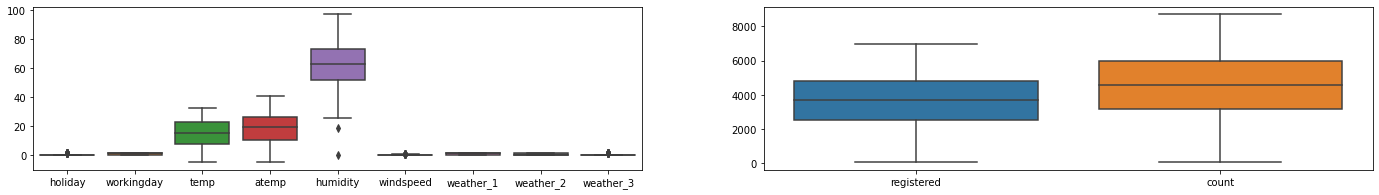

In [6]:
# Boite à moustaches des entrées 
plt.figure(figsize=(24, 3))
plt.subplot(121)
index = ['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'weather_1', 'weather_2', 'weather_3']
sns.boxplot(data=df[index], orient="v")
#'registered', 'count' (on trace ces deux variables ensembles pour des raisons de lisibilité)
plt.subplot(122)
sns.boxplot(data=df[['registered', 'count']], orient="v")

### Analyse de corrélation linéaire

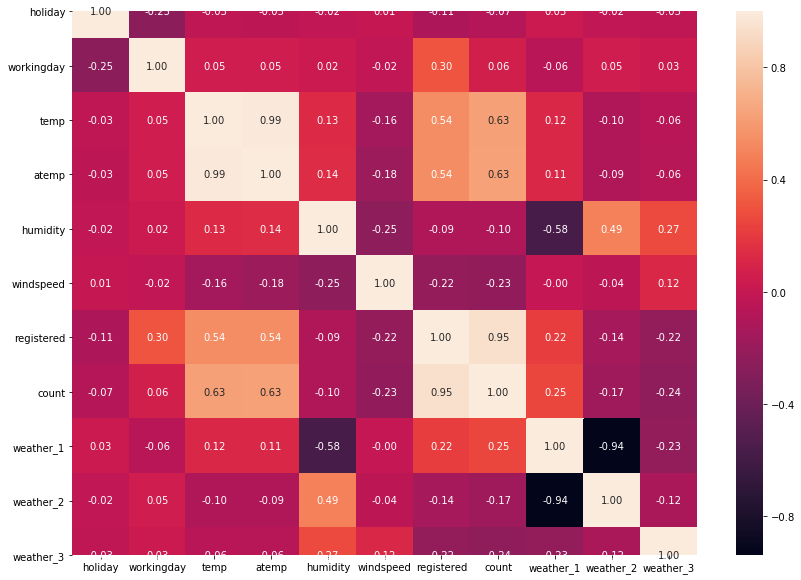

In [11]:
# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

## Partie 3 :  Mise en forme des données
On va récupérer les données sous la forme de la matrice des entrées X et le vecteur de sortie Y comme vu dans le cours 

In [7]:
variables = ['holiday', 'workingday', 'temp', 'humidity', 'windspeed','registered', 'weather_1', 'weather_2', 'weather_3']
X = df[variables].values
Y = df['count'].values

### Découpage des données en données d'apprentissage, validation et test

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42, stratify=X[:,8])

### Normalisation des variables

In [14]:
scaler_X = preprocessing.StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

## Partie 4 : Réalisez le modèle de régression linéaire 

L'objectif dans un premier temps est de construire le modèle $f(x) = \beta_0 + x^\top \beta$ avec $x \in \mathbb{R}^d$ le vecteur des entrées, $\beta$ le vecteur des paramètres et $\beta_0$ le biais. 

Construire ce modèle et évaluez ces performances

In [28]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_train, Y_train)

score = reg.score(X_train, Y_train)  
print("Training score: ", score)

Y_pred = reg.predict(X_test)
score = reg.score(X_test, Y_test)  
print("Test score: ", score)
print()
mse = mean_squared_error(Y_test, Y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f (Critère d'exactitude à bonne échelle)" % (mse**(1/2.0)))

Training score:  0.9633359691418134
Test score:  0.9675200620619275

MSE: 119589.71
RMSE: 345.82 (Critère d'exactitude à bonne échelle)


## Partie 5 : sélection de variables

Pour cela nous réalisons une régression pénalisée
$
\min_{\beta_0, \, \beta} \sum_{i=1}^n \left(y_i - \beta_0 - x_i^\top \beta \right)^2 + \lambda \Omega(\beta)
$
avec : 
* Pour la régression Ridge 
$\Omega(\beta) = \sum_{j=1}^p \beta_j^2$
* Pour le lasso 
$\Omega(\beta) = \sum_{j=1}^p |\beta_j|$

### Mise en oeuvre
* Testez les régressions ridge et lasso
* Que se passe-t-il quand on fait varier le paramètre de régularisation $\lambda$. On pourra tracer, comme dans le cours sur la régression linéaire, le chemin de régularisation. 
* Montrez comment choisir convenablement la bonne valeur de $\lambda$
* Comparez et commentez les résultats obtenus pour la régression ridge et lasso.

In [41]:
from sklearn.linear_model import Ridge, Lasso

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

ridge = Ridge()

coefs = []
errors = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
    errors.append([mse, np.mean((ridge.predict(X_test) - Y_test) ** 2)])


In [42]:
min(errors)

[119589.71082184753, 119217.44742263673]

In [43]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

lasso = Lasso()

coefs = []
errors = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    errors.append([mse, np.mean((lasso.predict(X_test) - Y_test) ** 2)])

In [44]:
min(errors)

[119589.71082184753, 119047.29452190353]